In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv('dados/mall.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

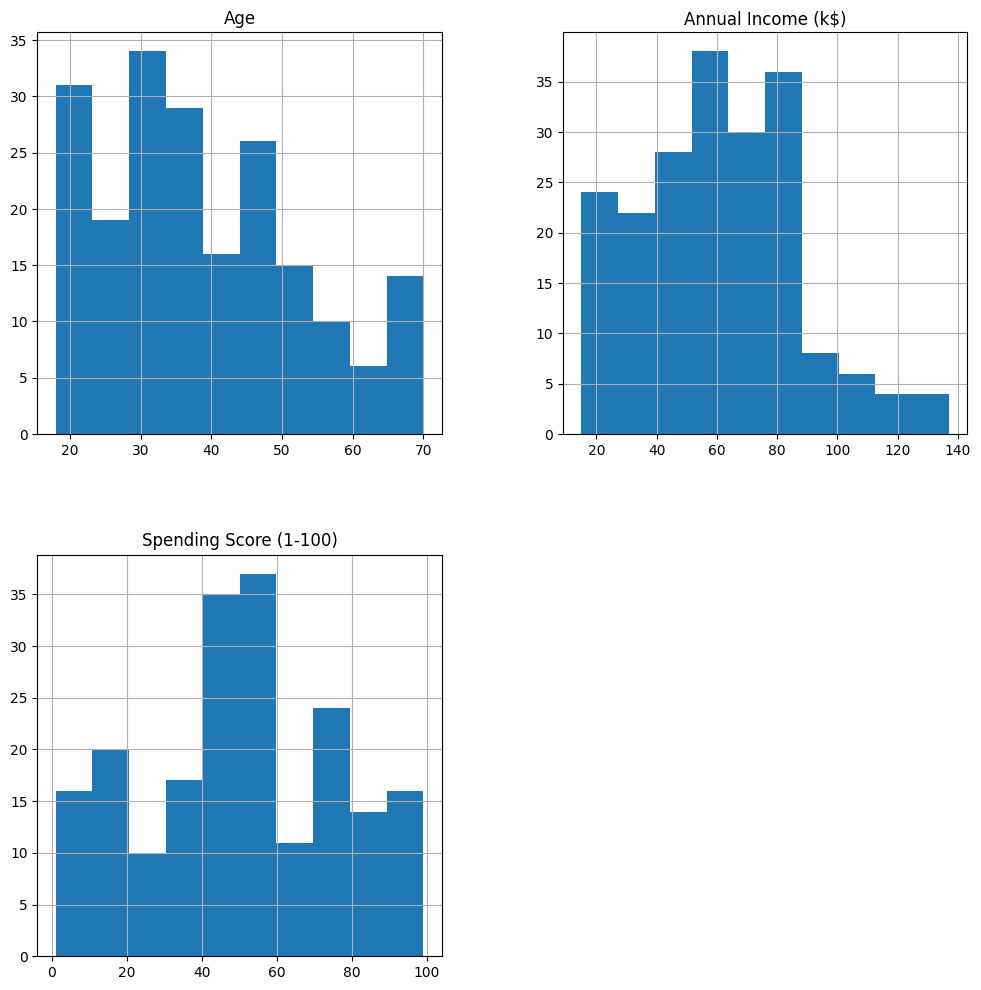

In [6]:
df[['Age','Annual Income (k$)','Spending Score (1-100)']].hist(figsize=(12,12))
plt.show()

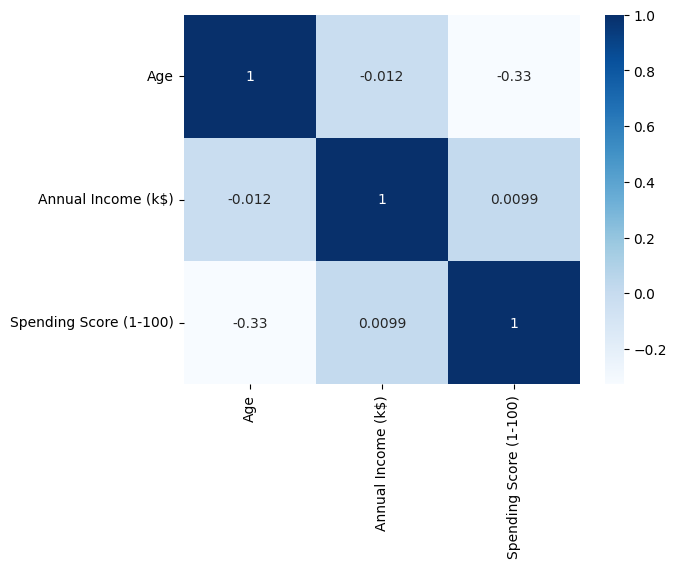

In [7]:
sns.heatmap(df.iloc[:,-3:].corr(), cmap='Blues', annot=True)
plt.show()

In [8]:
df['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

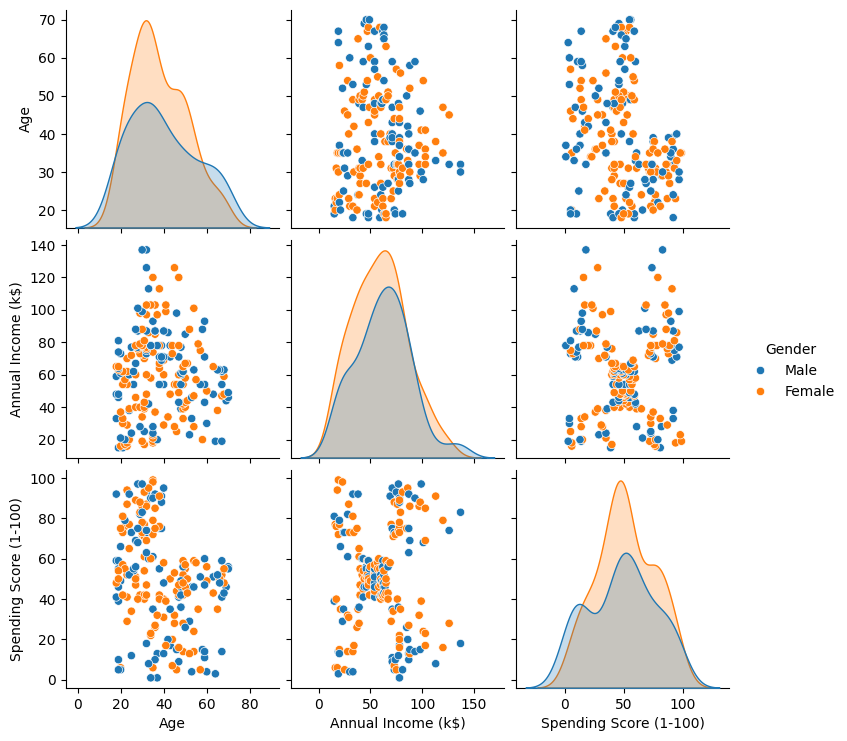

In [9]:
sns.pairplot(df.iloc[:,-4:], hue='Gender')
plt.show()

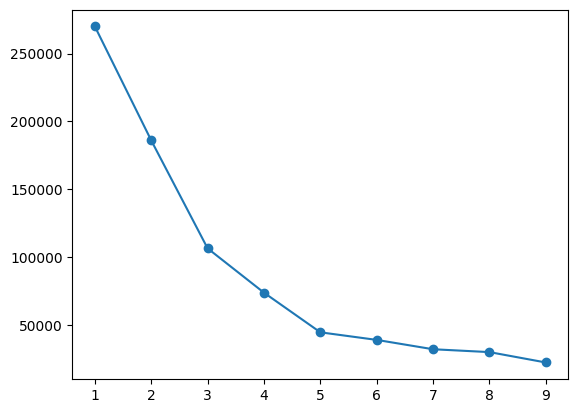

In [10]:
k = list(range(1,10))

mse = []

for i in k:
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    mse.append(kmeans.inertia_)

plt.plot(k, mse, '-o')
plt.show()

In [11]:
kmeans = KMeans(n_clusters=5, random_state=0)

kmeans.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])

kmeans_labels = kmeans.predict(df[['Annual Income (k$)',
                                   'Spending Score (1-100)']])

df['Cluster'] = kmeans_labels

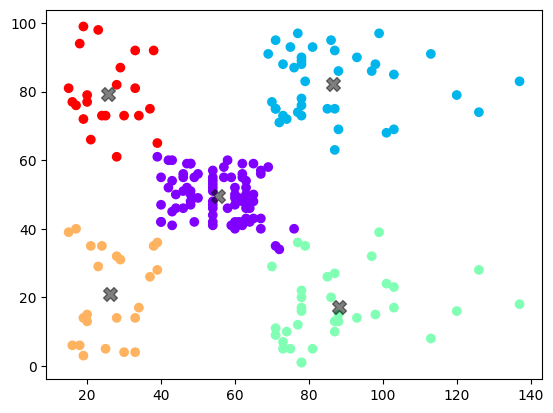

In [12]:
plt.scatter(df['Annual Income (k$)'],
            df['Spending Score (1-100)'], c=kmeans_labels, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            c='black', marker='X', s=100, alpha=0.5)
plt.show()

In [13]:
std_scaler = StandardScaler()

scaled_feat = std_scaler.fit_transform(df[['Annual Income (k$)',
                                           'Spending Score (1-100)']])

df_scaled_feat = pd.DataFrame(scaled_feat,
                              columns=['Annual Income (k$)',
                                       'Spending Score (1-100)'])

kmeans_scaled = KMeans(n_clusters=5, random_state=0)

kmeans_scaled.fit(df_scaled_feat)

kmeans_labels_scaled = kmeans_scaled.predict(df_scaled_feat)

df_scaled_feat['Cluster'] = kmeans_labels_scaled

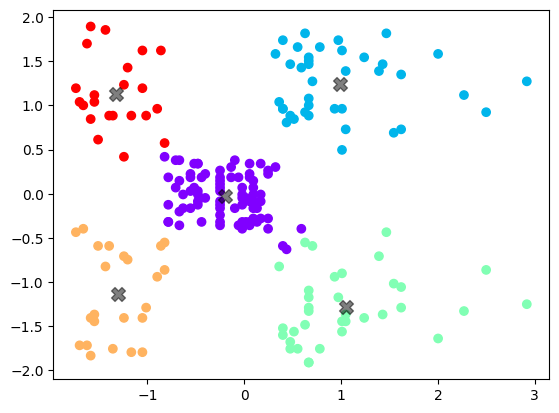

In [14]:
plt.scatter(df_scaled_feat['Annual Income (k$)'],
            df_scaled_feat['Spending Score (1-100)'], c=kmeans_labels_scaled,
            cmap='rainbow')
plt.scatter(kmeans_scaled.cluster_centers_[:,0],
            kmeans_scaled.cluster_centers_[:,1], c='black', marker='X', s=100,
            alpha=0.5)
plt.show()

In [15]:
silhouette_score(df[['Annual Income (k$)', 'Spending Score (1-100)']],
                 kmeans_labels)

np.float64(0.553931997444648)